In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from  sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt



In [4]:
# Loading dataset into a DataFrame
col = ['Education','Joining Year','City','Payment Tier','Age','Gender','EverBenched','ExperienceInCurrentDomain','LeaveOrNot']
df = pd.read_csv('Employee.csv', names = col)
df.head()

,Education,Joining Year,City,Payment Tier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,C,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
1,Bachelors,2017,Bangalore,3,34,Male,No,0,0
2,Bachelors,2013,Pune,1,28,Female,No,3,1
3,Bachelors,2014,New Delhi,3,38,Female,No,2,0
4,Masters,2016,Bangalore,3,27,Male,No,5,1


In [5]:
# Training Preparation
columns = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain','LeaveOrNot']
df.columns = columns
for column in columns:
    df.dropna(subset=[column], inplace=True)

In [6]:
# Vertical Splitting Data Set into Features and Label
X = df.drop("LeaveOrNot", axis=1)
y = df["LeaveOrNot"]


In [7]:
# Hot encoding features
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(X[categorical_columns])

#Create a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate
df_encoded = pd.concat([X, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)
print(f"Encoded Employee data : \n{df_encoded}")

X = df_encoded


Encoded Employee data : 
      Education_Bachelors  Education_C  Education_Masters  Education_PHD  \
0                     0.0          1.0                0.0            0.0   
1                     1.0          0.0                0.0            0.0   
2                     1.0          0.0                0.0            0.0   
3                     1.0          0.0                0.0            0.0   
4                     0.0          0.0                1.0            0.0   
...                   ...          ...                ...            ...   
4649                  1.0          0.0                0.0            0.0   
4650                  0.0          0.0                1.0            0.0   
4651                  0.0          0.0                1.0            0.0   
4652                  1.0          0.0                0.0            0.0   
4653                  1.0          0.0                0.0            0.0   

      JoiningYear_2012  JoiningYear_2013  JoiningYear_2014  Jo

In [8]:
# Horizontal Splitting For Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Implement KNearestNeighbor classifier
classifier = KNeighborsClassifier(n_neighbors=7)
KNeighborsClassifier()

#Training model
classifier.fit(X_train, y_train)

# Evaluating the model's accuracy on the test set
y_prediction = classifier.score(X_test,y_test)
print("Test data accuracy using KNN: ",y_prediction)

Test data accuracy using KNN:  0.8163265306122449


In [10]:
# Implement Gaussian classifier
gclassifier = GaussianNB()

#Training model
gclassifier.fit(X_train, y_train)

# Evaluating the model's accuracy on the test set
y_prediction = gclassifier.score(X_test,y_test) # test data 20% is used now for accuracy check for n=7
print("Test data accuracy using gaussian: ",y_prediction)


Test data accuracy using gaussian:  0.7261009667024705


In [11]:
# Implement MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(40,10), activation = 'tanh', learning_rate_init=0.001, solver= 'adam', max_iter=1000, random_state=100)

# Train the model on the training data
mlp.fit(X_train, y_train)

# Making predictions on the test data
y_pred = mlp.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 0.78


In [12]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        np.random.seed(42)
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size) * 0.01
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size) * 0.01
        self.bias_output = np.zeros((1, self.output_size))

        # Adam optimizer parameters
        self.m_wih = np.zeros_like(self.weights_input_hidden)
        self.v_wih = np.zeros_like(self.weights_input_hidden)
        self.m_bh = np.zeros_like(self.bias_hidden)
        self.v_bh = np.zeros_like(self.bias_hidden)
        self.m_who = np.zeros_like(self.weights_hidden_output)
        self.v_who = np.zeros_like(self.weights_hidden_output)
        self.m_bo = np.zeros_like(self.bias_output)
        self.v_bo = np.zeros_like(self.bias_output)
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        self.t = 0

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_layer_input)
        return self.predicted_output

    def backward(self, X, y):
        self.t += 1

        # Output layer error and gradient
        error_output = self.predicted_output - y.values.reshape(-1, 1)  # Convert y to NumPy array before reshaping
        gradient_output = error_output * self.sigmoid_derivative(self.predicted_output)

        # Hidden layer error and gradient
        error_hidden = np.dot(gradient_output, self.weights_hidden_output.T)
        gradient_hidden = error_hidden * self.sigmoid_derivative(self.hidden_layer_output)

        # Gradients for weights and biases
        grad_who = np.dot(self.hidden_layer_output.T, gradient_output)
        grad_bo = np.sum(gradient_output, axis=0, keepdims=True)
        grad_wih = np.dot(X.T, gradient_hidden)
        grad_bh = np.sum(gradient_hidden, axis=0, keepdims=True)

        # Adam optimizer updates
        self.m_who = self.beta1 * self.m_who + (1 - self.beta1) * grad_who
        self.v_who = self.beta2 * self.v_who + (1 - self.beta2) * (grad_who ** 2)
        m_who_hat = self.m_who / (1 - self.beta1 ** self.t)
        v_who_hat = self.v_who / (1 - self.beta2 ** self.t)

        self.m_bo = self.beta1 * self.m_bo + (1 - self.beta1) * grad_bo
        self.v_bo = self.beta2 * self.v_bo + (1 - self.beta2) * (grad_bo ** 2)
        m_bo_hat = self.m_bo / (1 - self.beta1 ** self.t)
        v_bo_hat = self.v_bo / (1 - self.beta2 ** self.t)

        self.m_wih = self.beta1 * self.m_wih + (1 - self.beta1) * grad_wih
        self.v_wih = self.beta2 * self.v_wih + (1 - self.beta2) * (grad_wih ** 2)
        m_wih_hat = self.m_wih / (1 - self.beta1 ** self.t)
        v_wih_hat = self.v_wih / (1 - self.beta2 ** self.t)

        self.m_bh = self.beta1 * self.m_bh + (1 - self.beta1) * grad_bh
        self.v_bh = self.beta2 * self.v_bh + (1 - self.beta2) * (grad_bh ** 2)
        m_bh_hat = self.m_bh / (1 - self.beta1 ** self.t)
        v_bh_hat = self.v_bh / (1 - self.beta2 ** self.t)

        # Update weights and biases
        self.weights_hidden_output -= self.learning_rate * m_who_hat / (np.sqrt(v_who_hat) + self.epsilon)
        self.bias_output -= self.learning_rate * m_bo_hat / (np.sqrt(v_bo_hat) + self.epsilon)
        self.weights_input_hidden -= self.learning_rate * m_wih_hat / (np.sqrt(v_wih_hat) + self.epsilon)
        self.bias_hidden -= self.learning_rate * m_bh_hat / (np.sqrt(v_bh_hat) + self.epsilon)

    def compute_loss(self, y):
        y = y.values.reshape(-1, 1)  # or y = y.values.flatten().reshape(-1, 1) if y is already a NumPy array
        return -np.mean(y * np.log(self.predicted_output) + (1 - y) * np.log(1 - self.predicted_output))



In [13]:
col = ['Education','Joining Year','City','Payment Tier','Age','Gender','EverBenched','ExperienceInCurrentDomain','LeaveOrNot']
df = pd.read_csv('Employee.csv',names=col)
target = 'LeaveOrNot'
X = df.drop(columns=[target])
y = df[target]

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(X[categorical_cols])

# Combine numerical and encoded categorical data
X = X.drop(columns=categorical_cols)
X = np.hstack([X.values, encoded_categorical])

# Encode target variable
if y.dtype == 'object' or len(y.unique()) > 2:
    y = (y == y.unique()[1]).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the neural network
input_size = X_train.shape[1]
hidden_size = 100
output_size = 1
learning_rate = 0.001

nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
epochs = 500
loss_history = []
acc_history = []
test_acc_history = []
for epoch in range(epochs):
    nn.forward(X_train)
    nn.backward(X_train, y_train)
    loss = nn.compute_loss(y_train)
    loss_history.append(loss)  # Store loss at every epoch
    predicted_output_train = nn.forward(X_train)
    predicted_train_binary = (predicted_output_train > 0.5).astype(int)
    train_accuracy = np.mean(predicted_train_binary.flatten() == y_train)
    acc_history.append(train_accuracy)
    predicted_output_test = nn.forward(X_test)
    predicted_test_binary = (predicted_output_test > 0.5).astype(int)
    test_accuracy = np.mean(predicted_test_binary.flatten() == y_test)

    # Store test accuracy
    test_acc_history.append(test_accuracy)


    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, Training Accuracy: {train_accuracy:.2f}")


# Calculate training accuracy
predicted_output_train = nn.forward(X_train)
predicted_train_binary = (predicted_output_train > 0.5).astype(int)
train_accuracy = np.mean(predicted_train_binary.flatten() == y_train)
print(f"Train Accuracy: {train_accuracy:.2f}")

# Calculating on test data
predicted_output_test = nn.forward(X_test)
predicted_binary = (predicted_output_test > 0.5).astype(int)
accuracy = np.mean(predicted_binary.flatten() == y_test)
print(f"Test Accuracy: {accuracy:.2f}")




Epoch 0, Loss: 0.6977, Training Accuracy: 0.66
Epoch 50, Loss: 0.6361, Training Accuracy: 0.66
Epoch 100, Loss: 0.6258, Training Accuracy: 0.66
Epoch 150, Loss: 0.6023, Training Accuracy: 0.66
Epoch 200, Loss: 0.5629, Training Accuracy: 0.71
Epoch 250, Loss: 0.5274, Training Accuracy: 0.76
Epoch 300, Loss: 0.5045, Training Accuracy: 0.79
Epoch 350, Loss: 0.4897, Training Accuracy: 0.80
Epoch 400, Loss: 0.4801, Training Accuracy: 0.81
Epoch 450, Loss: 0.4740, Training Accuracy: 0.81
Train Accuracy: 0.82
Test Accuracy: 0.79


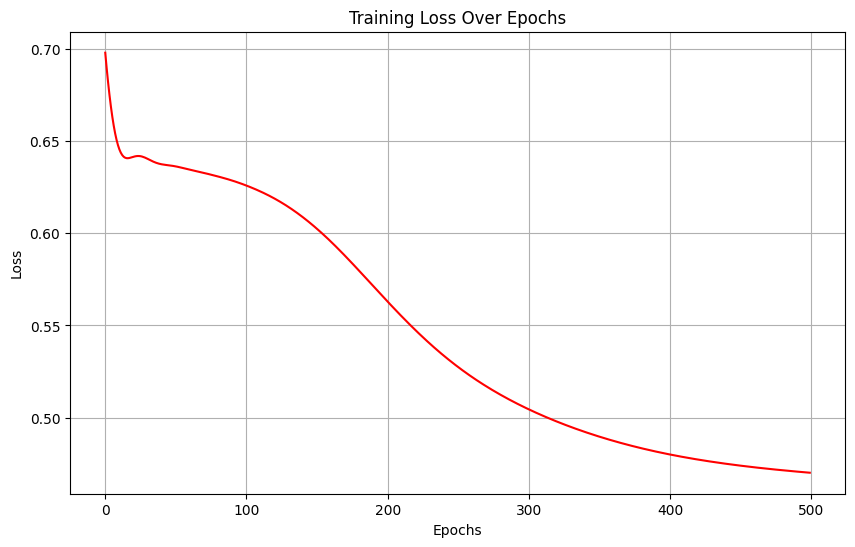

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history, label="Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()